In [2]:
import os

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

import intmcp.plot as plot_lib
import intmcp.plot._parts as parts

# Change this to plot different problem
problem_name = "pe"

# Change dir name to use different base dir
exp_results_dir = 'pe/results'

df, results_dir = plot_lib.load_results(problem_name, exp_results_dir, iros=True)

print(plot_lib.results_summary(df, include_headers=False))

agent_i = 1
agent_j = 0

Num Exps = 103
Agent IDs = [0 1]
Num Sims = [  16  128  512 1024 2048 4096]
Nesting levels = [0 1 2 3]
Step Limits = [40]
Policy Classes = ['NestedSearchTree' 'PESPPolicy' 'RandomPolicy']
Rollout Policies = ['None'
 "{0: (<class 'posgmcp.envs.pe.policies.PESPPolicy'>, {'r_hi': 90, 'r_lo': -138}), 1: (<class 'posgmcp.policy.random_policy.RandomPolicy'>, {})}"]


In [3]:
# Want to remove all rows in df where agent j == PESPPolicy
random_j_df = df[(df[parts.POLICY_KEY] == 'PESPPolicy') & (df[parts.AGENT_ID_KEY] == agent_j)]
exp_ids = random_j_df[parts.EXP_ID_KEY].unique()
df = df[~df.exp_id.isin(exp_ids)]
print(df[parts.POLICY_KEY].unique())

['NestedSearchTree' 'RandomPolicy' 'PESPPolicy']


/home/jonathon/Code/i-ntmcp/intmcp/plot/_plot_pairwise_pis_y_by_x.py:183: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


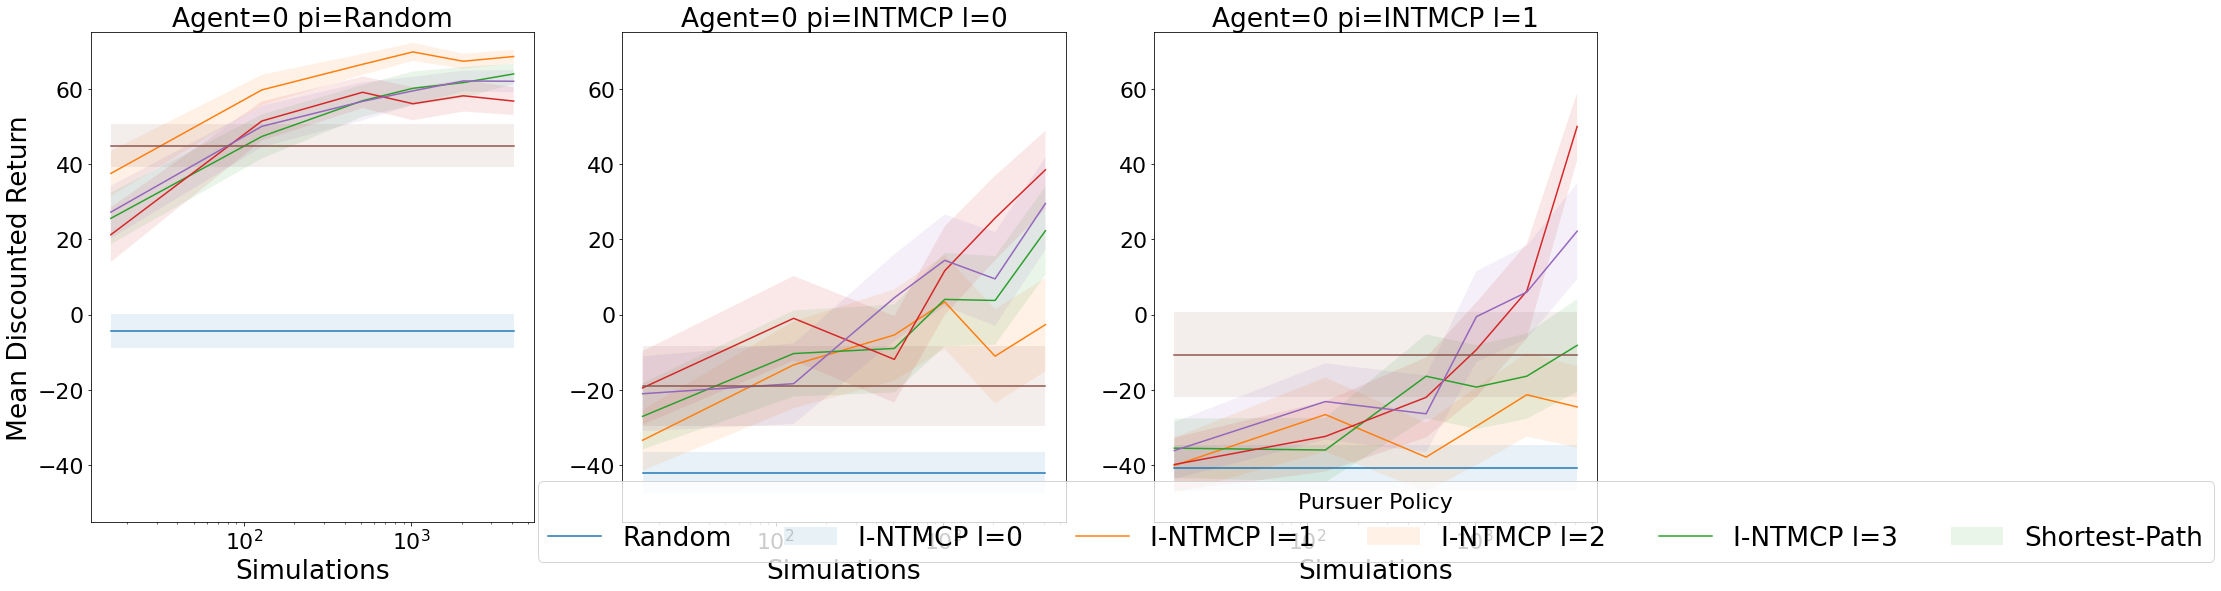

In [5]:
plot_lib.plot_pairwise_pis_y_by_x(
    df, 
    x_key="num_sims",
    y_key="episode_discounted_returns_mean", 
    y_err_key="episode_discounted_returns_CI",
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Mean Discounted Return",
        "xlabel": "Simulations",
        "sharex": False,
        "sharey": False,
        "fontsize": 'large',
        "ylim": (-55, 75),
        "logx": True,
        "logy": False,
        "axes_titles": ["a) Random Evader", "b) I-NTMCP l=0 Evader", "c) I-NTMCP l=1 Evader"],
        "axes_title_kwargs": {
            "fontsize": 'large',
            "loc": "left"
        },
        "legend_kwargs": {
            "labels": ["Random", "I-NTMCP l=0", "I-NTMCP l=1", "I-NTMCP l=2", "I-NTMCP l=3", "Shortest-Path"],
            'title': 'Pursuer Policy',
            'fontsize': 'large',
            "bbox_to_anchor": [0.5, 0.0],
            "loc": 'center',
            "ncol": 6
        }
    }
)

/home/jonathon/Code/i-ntmcp/intmcp/plot/_plot_pairwise_pis_y_by_x.py:183: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


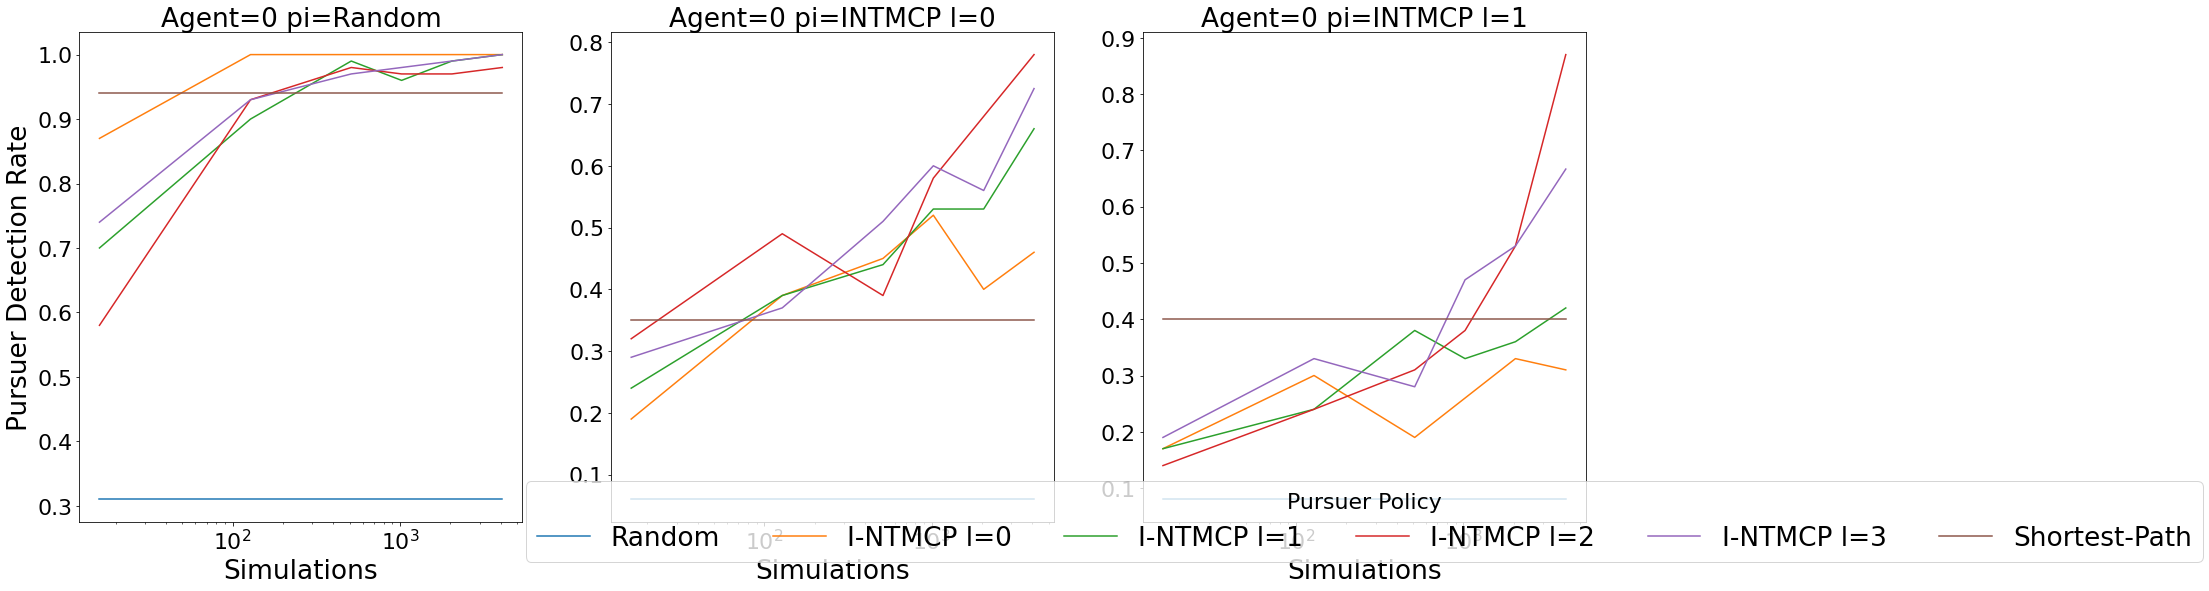

In [6]:
plot_lib.plot_pairwise_pis_y_by_x(
    df, 
    x_key="num_sims",
    y_key="proportion_num_outcome_WIN",  
    y_err_key=None,
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Pursuer Detection Rate",
        "xlabel": "Simulations",
        "sharex": False,
        "sharey": False,
        "fontsize": 'large',
        # "ylim": (-55, 75),
        "logx": True,
        "logy": False,
        "axes_titles": ["a) Random Evader", "b) I-NTMCP l=0 Evader", "c) I-NTMCP l=1 Evader"],
        "axes_title_kwargs": {
            "fontsize": 'large',
            "loc": "left"
        },
        "legend_kwargs": {
            "labels": ["Random", "I-NTMCP l=0", "I-NTMCP l=1", "I-NTMCP l=2", "I-NTMCP l=3", "Shortest-Path"],
            'title': 'Pursuer Policy',
            'fontsize': 'large',
            "bbox_to_anchor": [0.5, 0.0],
            "loc": 'center',
            "ncol": 6
        }
    }
)

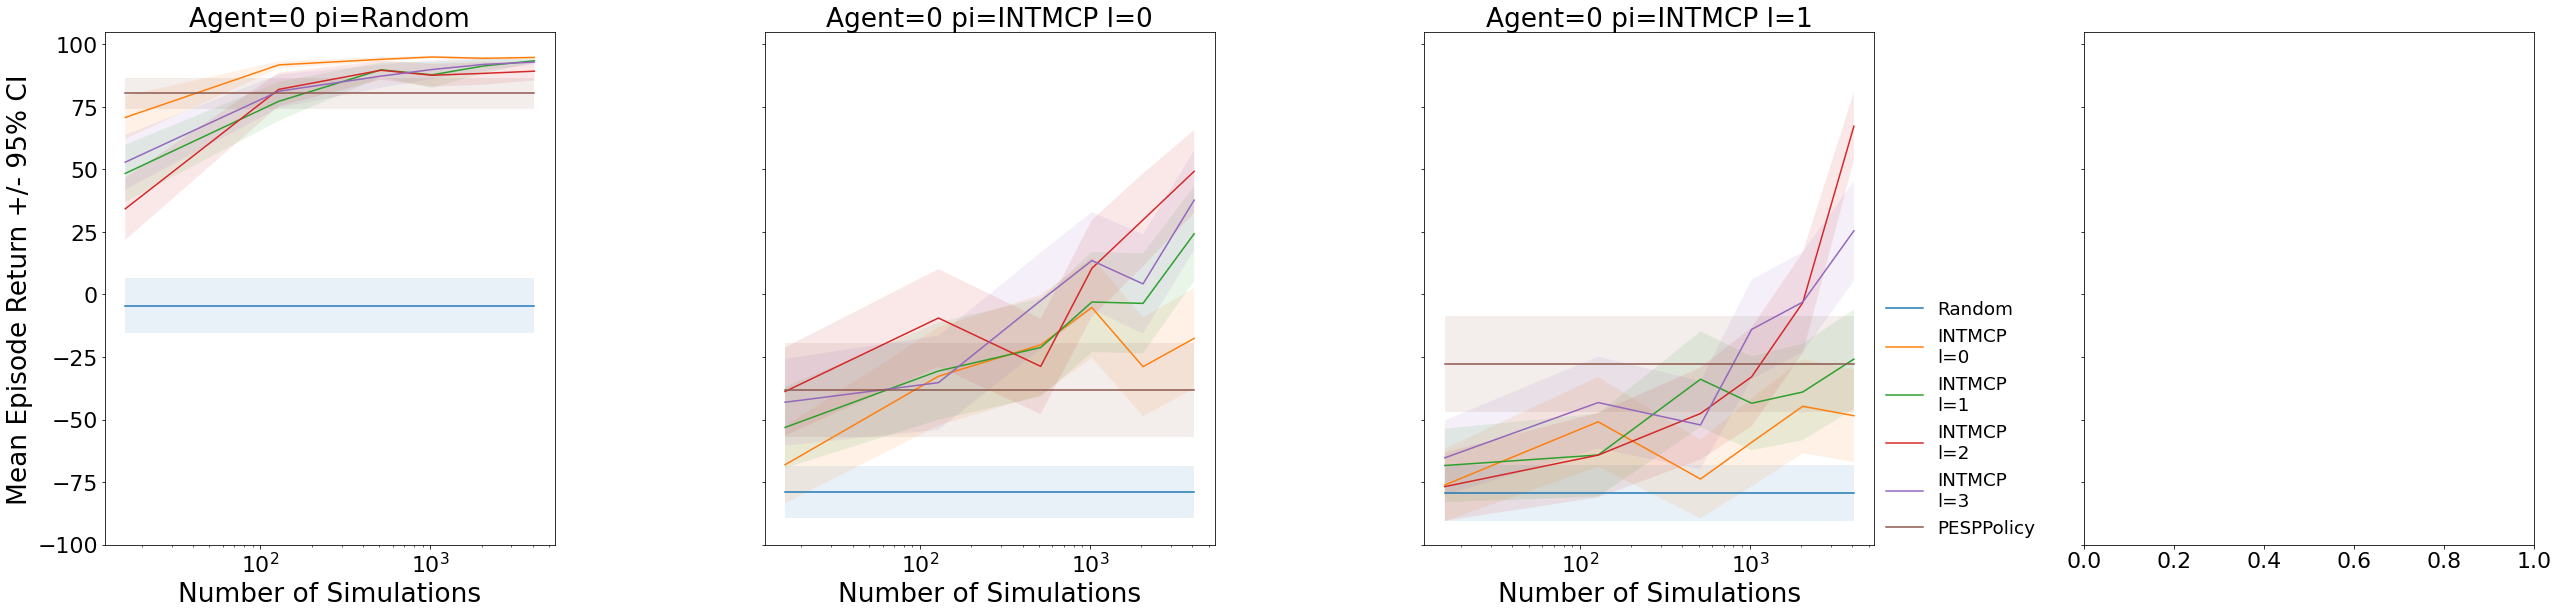

In [7]:
plot_lib.plot_pairwise_pis_y_by_x(
    df, 
    x_key="num_sims",
    y_key="episode_returns_mean", 
    y_err_key="episode_returns_CI",
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Mean Episode Return +/- 95% CI",
        "xlabel": "Number of Simulations",
        "sharex": False,
        "sharey": True,
        "logx": True,
        "fontsize": 'large',
        # "ylim": (-0.7, 0.9),
        'ncols': 4,
        "legend_kwargs": {
            'loc': 'lower left',
            'bbox_to_anchor': (1.01, 0.0),
            'ncol': 1,
            'borderaxespad': 0,
            'frameon': False,
            'fontsize': 'small',
        }
    }
)

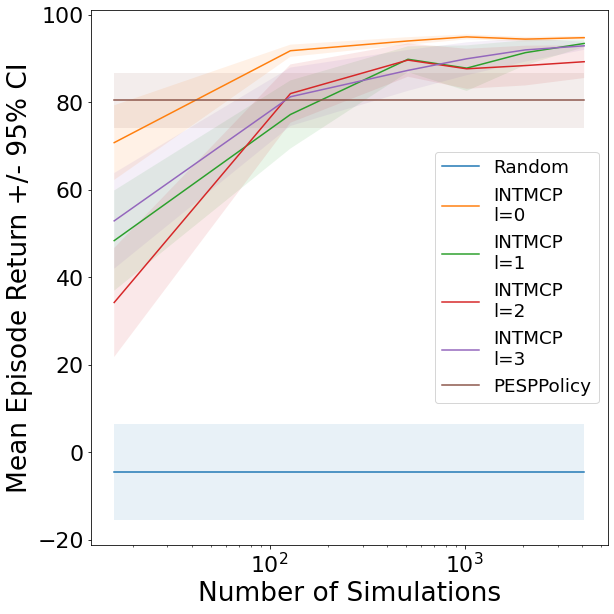

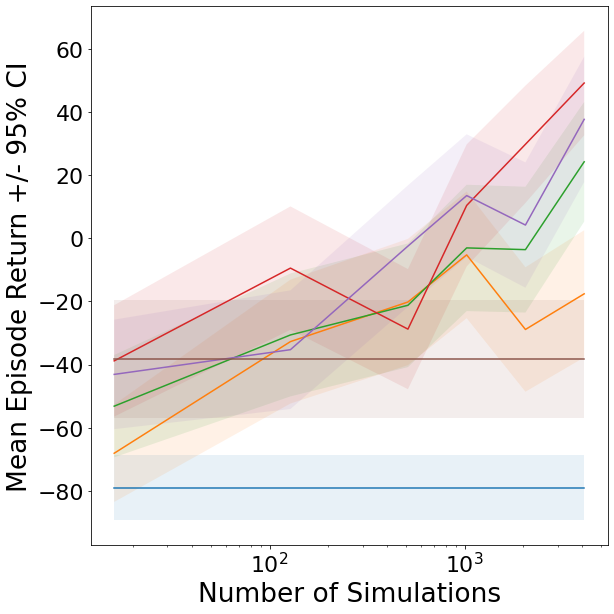

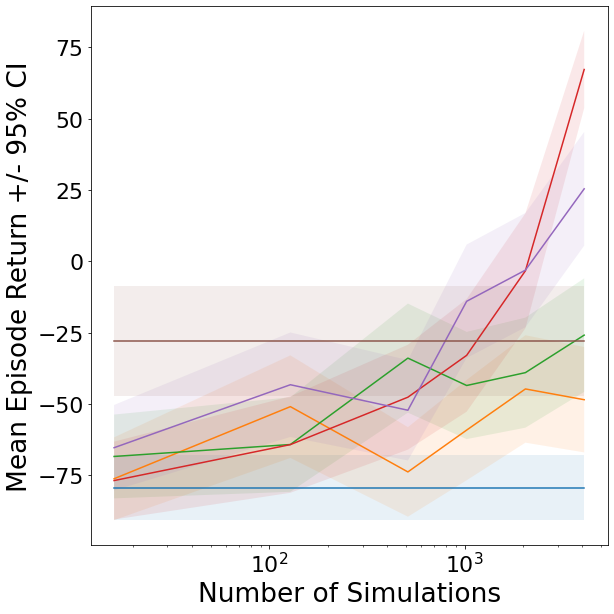

In [8]:
plot_lib.plot_seperate_pairwise_pis_y_by_x(
    df, 
    x_key="num_sims",
    y_key="episode_returns_mean", 
    y_err_key="episode_returns_CI",
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Mean Episode Return +/- 95% CI",
        "xlabel": "Number of Simulations",
        "sharex": False,
        "sharey": True,
        "logx": True,
        "fontsize": 'large',
        # "ylim": (-120, 120),
        "show_title": False,
        "legend_kwargs": {
            'fontsize': 'small',
            'loc': 'right'
        }
    }
)

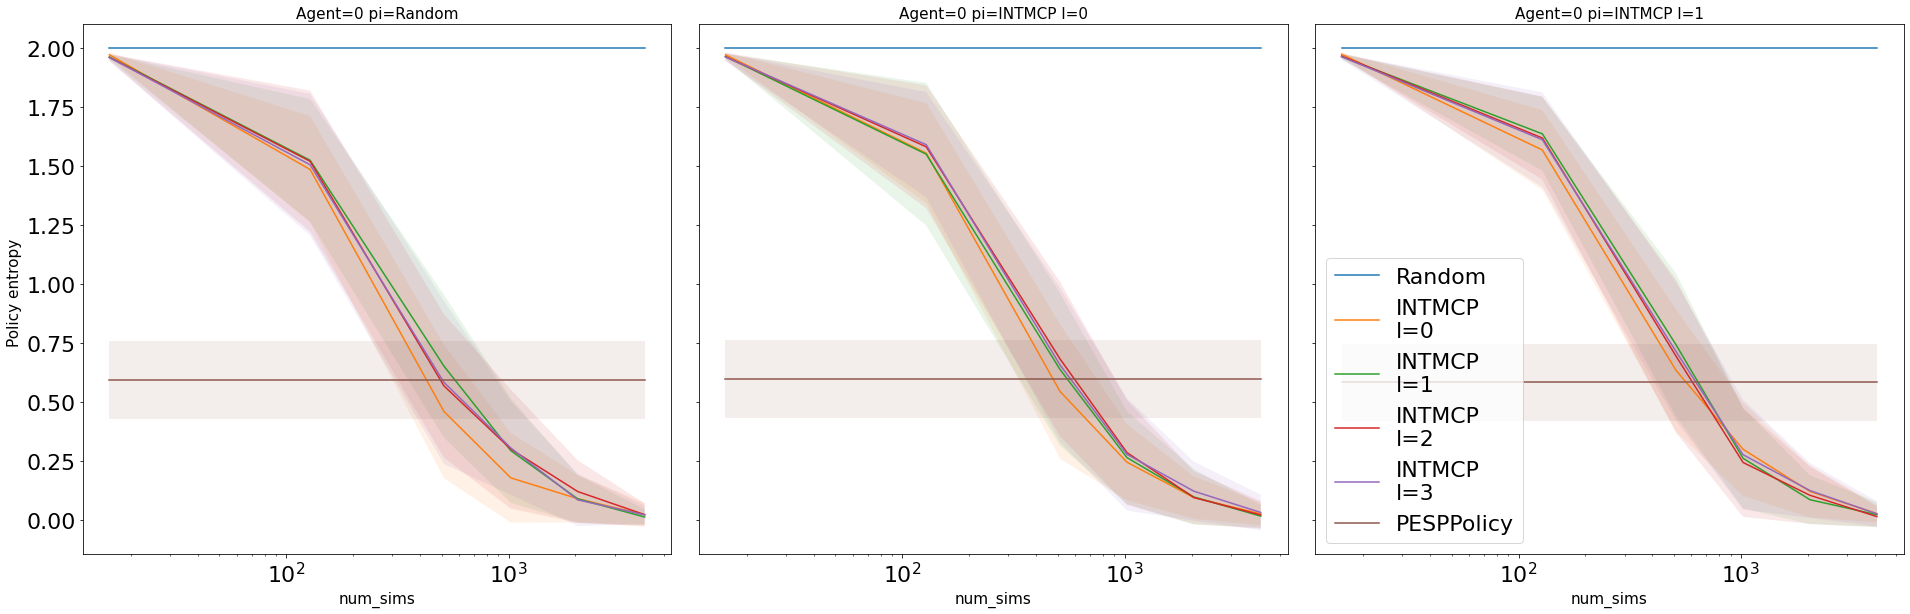

In [9]:
plot_lib.plot_pairwise_pis_y_by_x(
    df, 
    x_key="num_sims",
    y_key="policy_entropy_mean", 
    y_err_key="policy_entropy_std",
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Policy entropy ",
        "sharex": False,
        "sharey": True
    }
)

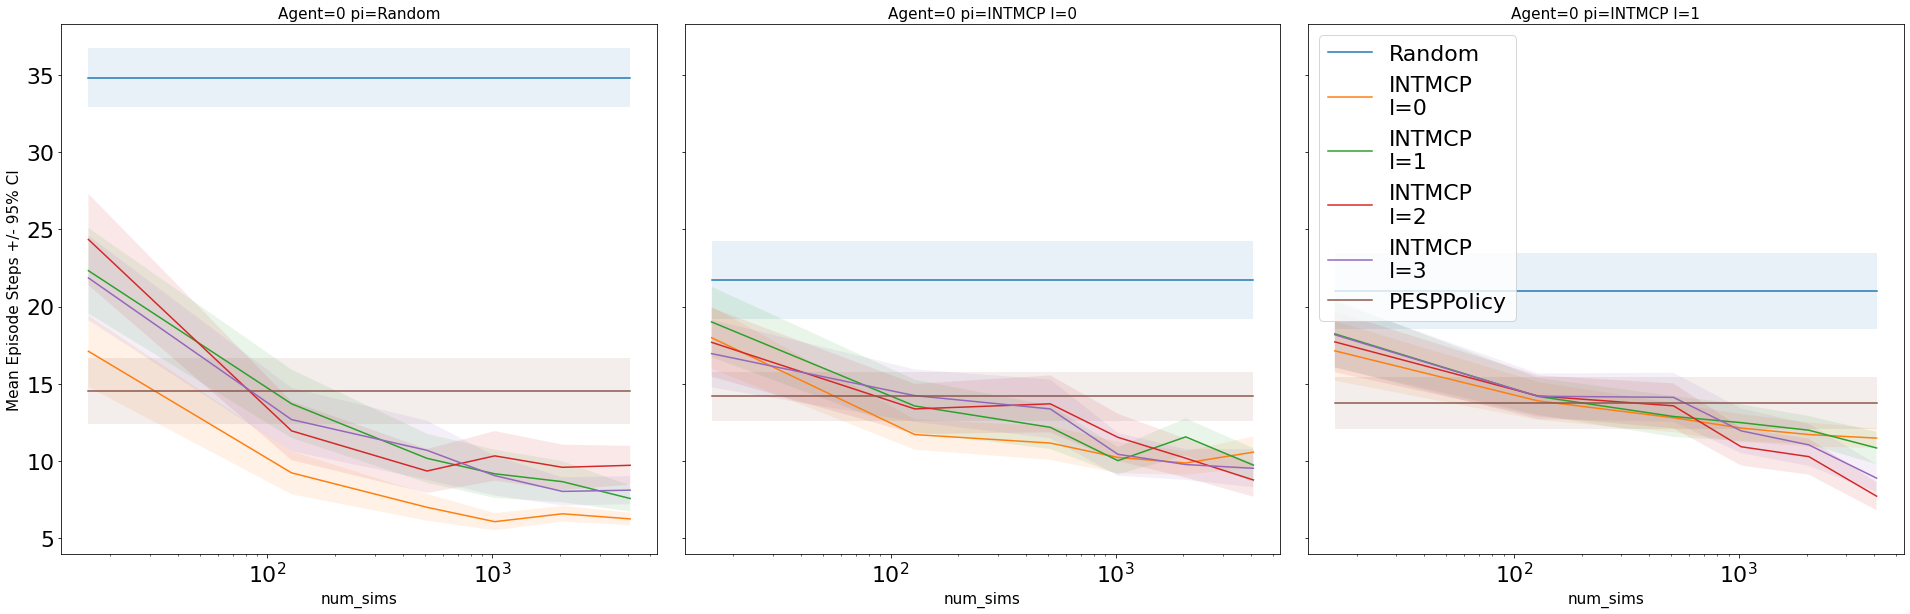

In [10]:
plot_lib.plot_pairwise_pis_y_by_x(
    df, 
    x_key="num_sims",
    y_key="episode_steps_mean", 
    y_err_key="episode_steps_CI",
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Mean Episode Steps +/- 95% CI",
        "sharex": False,
        "sharey": True
    }
)

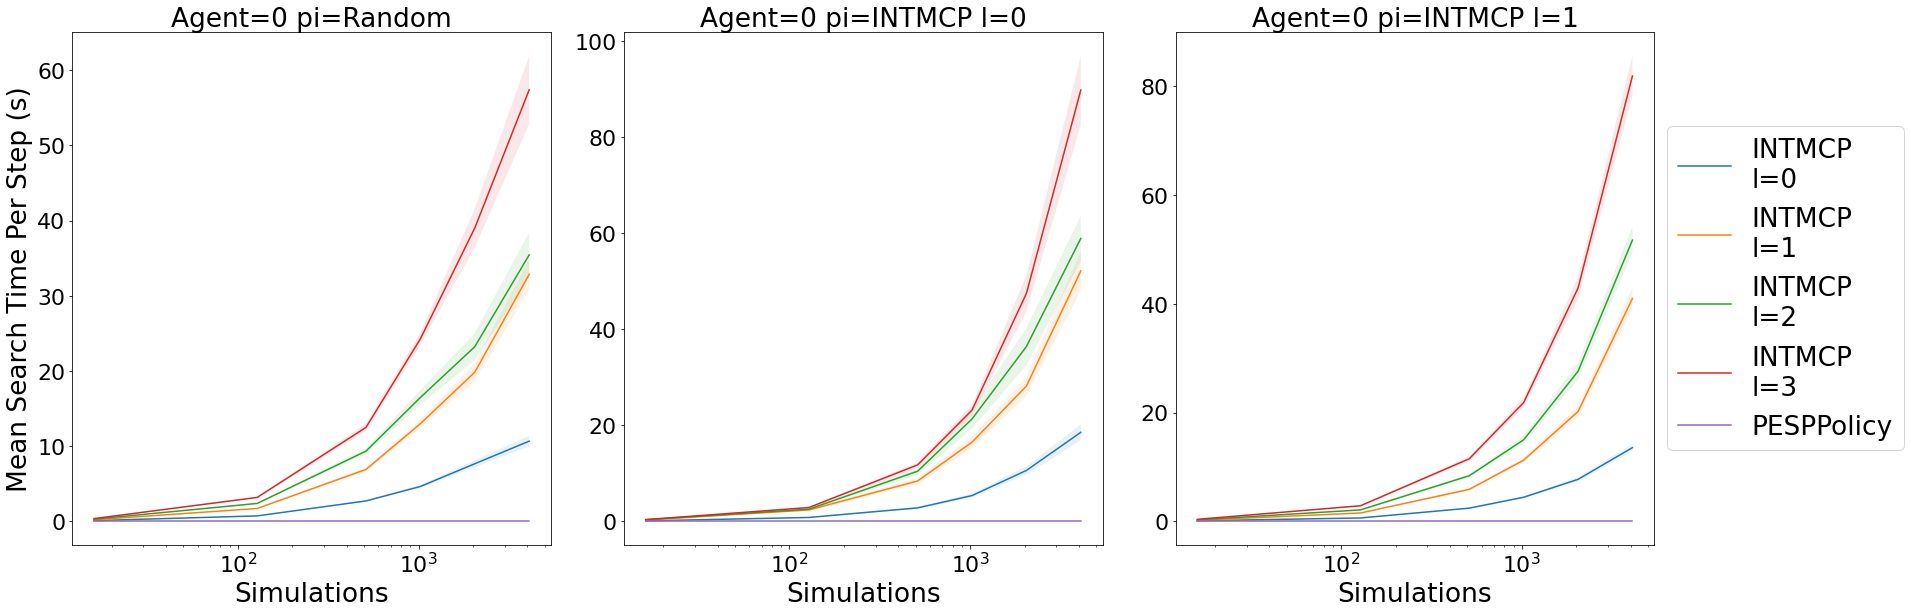

In [11]:
# Want to remove all rows in df where agent j == RandomPolicy
to_exclude_df = df[
    (df[parts.AGENT_ID_KEY] == agent_j)
    & (df[parts.POLICY_KEY] == 'RCNestedReasoningPolicy')
    & (df.nesting_level.isin([1, 2, 3]))
]
exp_ids = to_exclude_df[parts.EXP_ID_KEY].unique()
time_df = df[~df.exp_id.isin(exp_ids)]

to_exclude_df = time_df[
    (df[parts.AGENT_ID_KEY] == agent_i)
    & (df[parts.POLICY_KEY] == 'RandomPolicy')
]
exp_ids = to_exclude_df[parts.EXP_ID_KEY].unique()
time_df = time_df[~time_df.exp_id.isin(exp_ids)]

plot_lib.plot_pairwise_pis_y_by_x(
    time_df, 
    x_key='num_sims',
    y_key="search_time_mean", 
    y_err_key="search_time_CI",
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Mean Search Time Per Step (s)",
        "xlabel": "Simulations",
        "sharex": False,
        "sharey": False,
        "logx": True,
        "logy": True,
        "fontsize": 'large',
        "axes_titles": [""],
        "axes_title_kwargs": {
            "fontsize": 'large',
            "loc": "left"
        },
        "legend_kwargs": {
            'fontsize': 'large',
            "bbox_to_anchor": [1.0, 0.5],
            "loc": 'center left',
            "ncol": 1
        }
    }
)

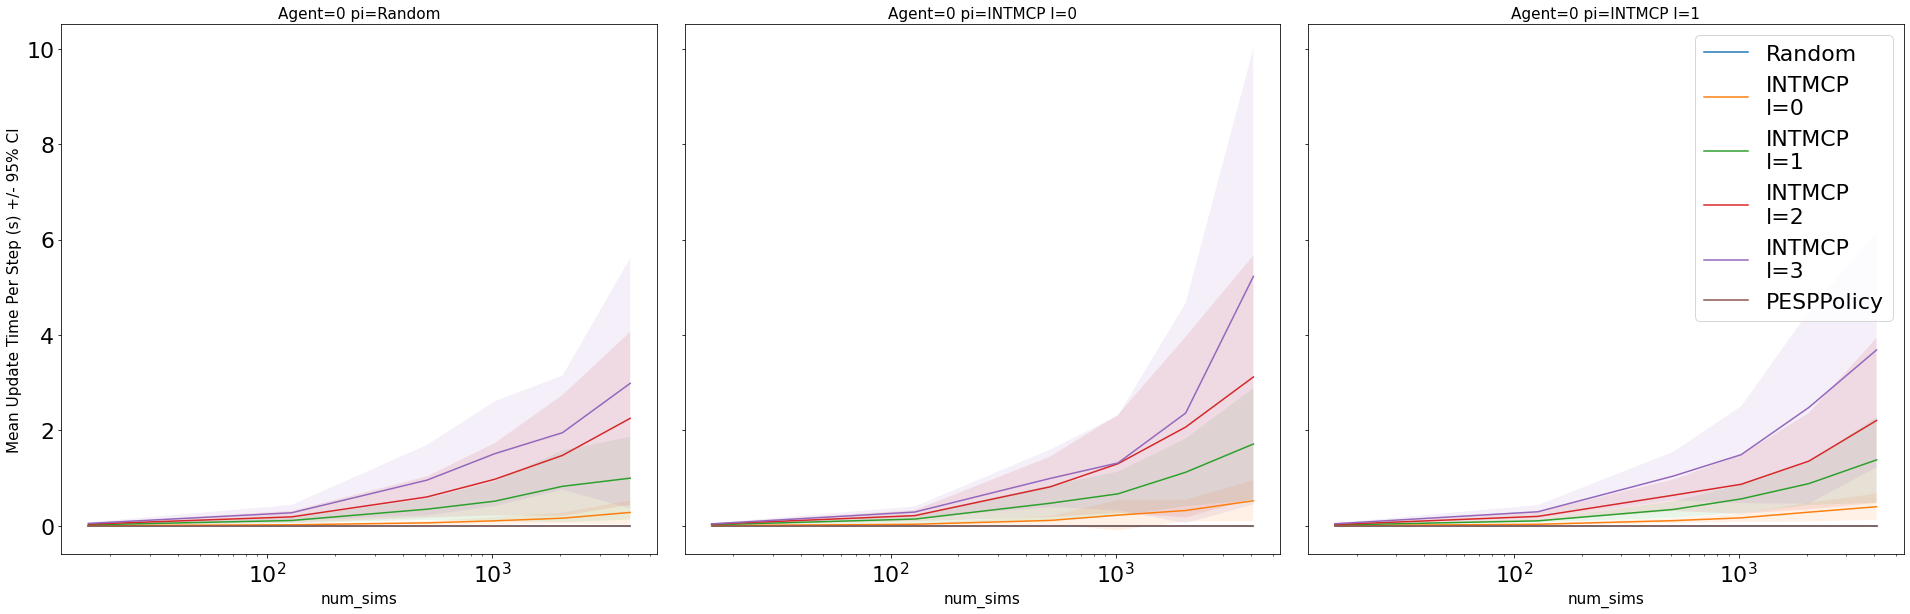

In [12]:
plot_lib.plot_pairwise_pis_y_by_x(
    df, 
    x_key='num_sims',
    y_key="update_time_mean", 
    y_err_key="update_time_std",
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Mean Update Time Per Step (s) +/- 95% CI",
        "sharex": False,
        "sharey": True,
        "logx": True
    }
)

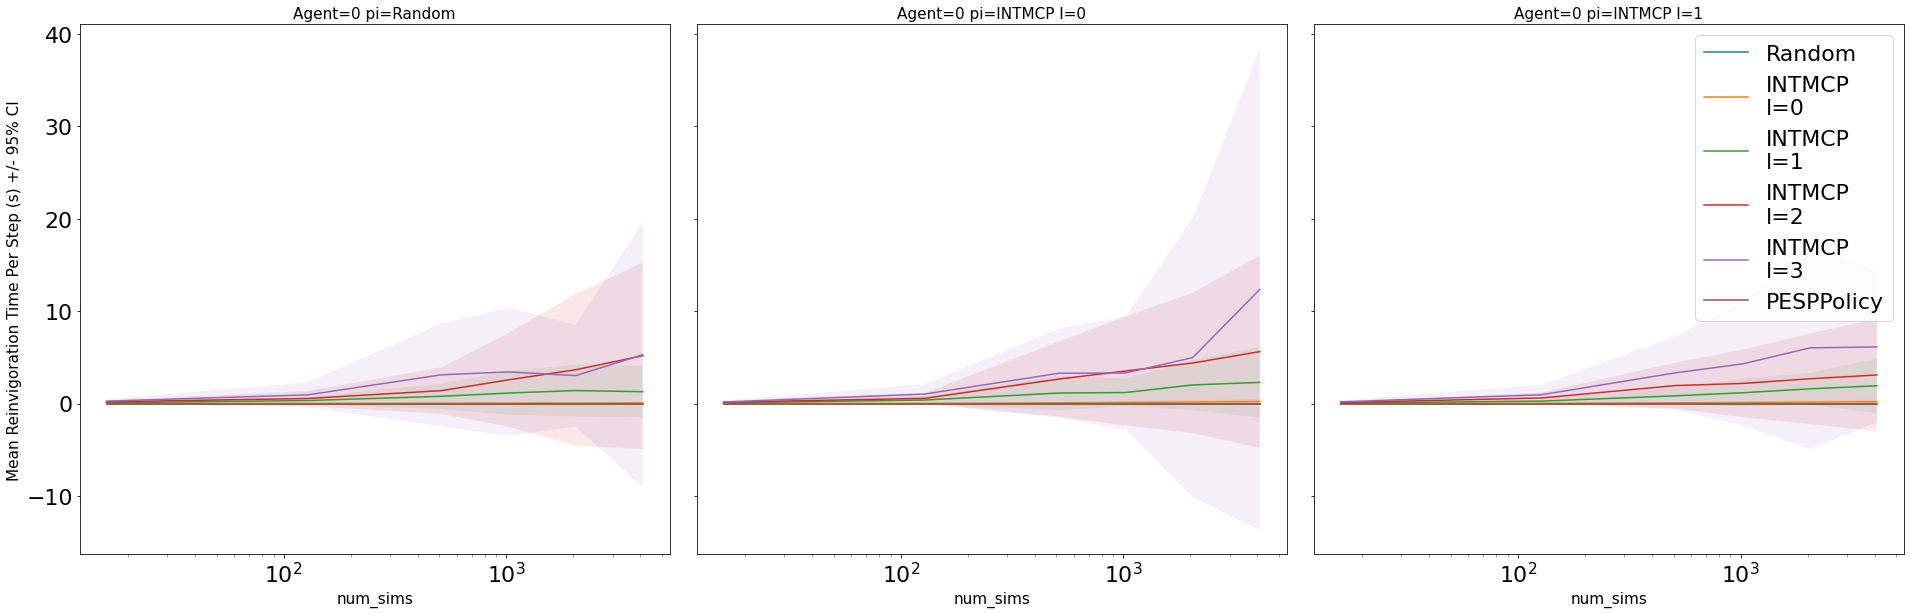

In [13]:
plot_lib.plot_pairwise_pis_y_by_x(
    df, 
    x_key='num_sims',
    y_key="reinvigoration_time_mean", 
    y_err_key="reinvigoration_time_std",
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Mean Reinvigoration Time Per Step (s) +/- 95% CI",
        "sharex": False,
        "sharey": True,
        "logx": True
    }
)

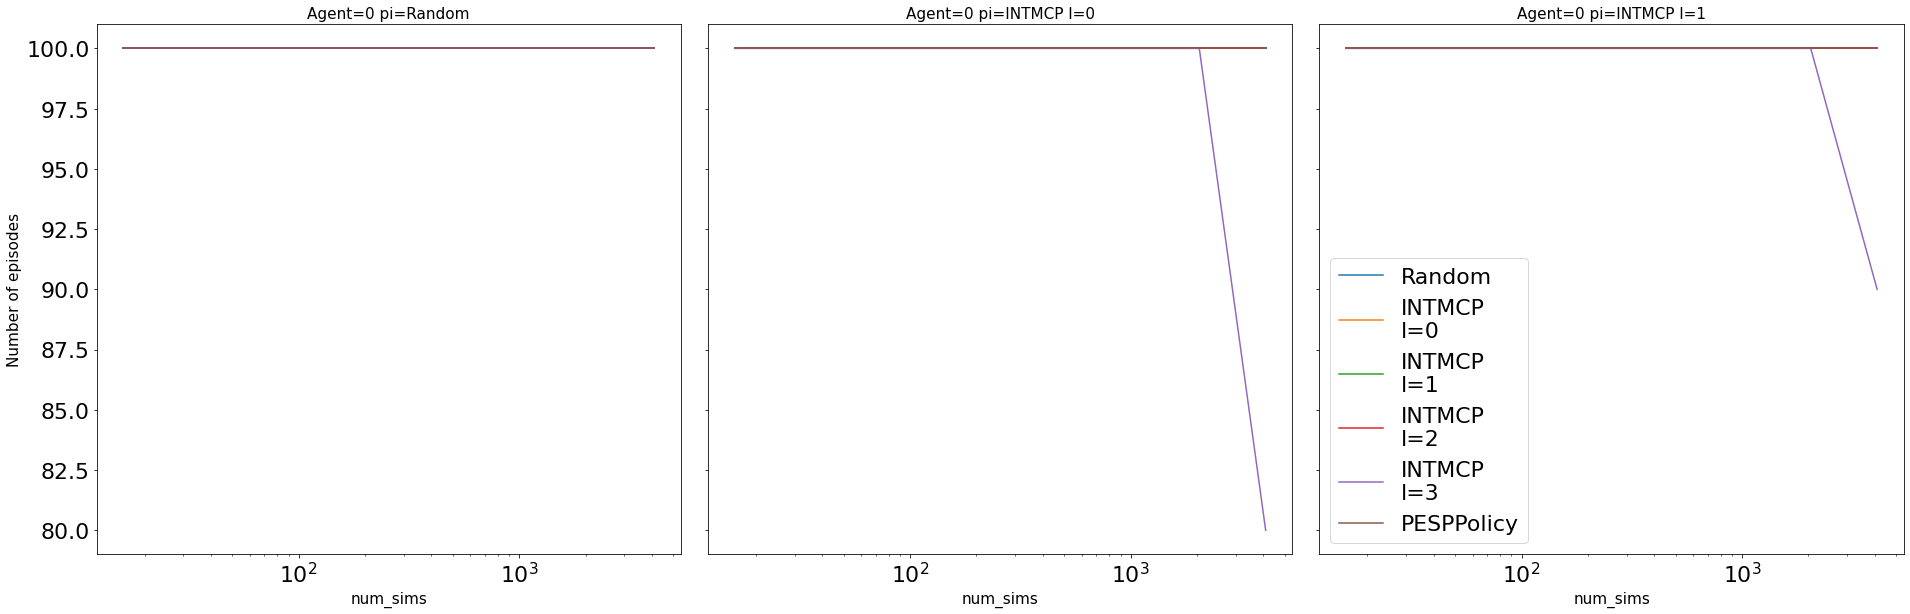

In [14]:
plot_lib.plot_pairwise_pis_y_by_x(
    df, 
    x_key='num_sims',
    y_key="num_episodes", 
    y_err_key=None,
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Number of episodes",
        "sharex": False,
        "sharey": True,
        "logy": False
    }
)

In [ ]:
df.columns


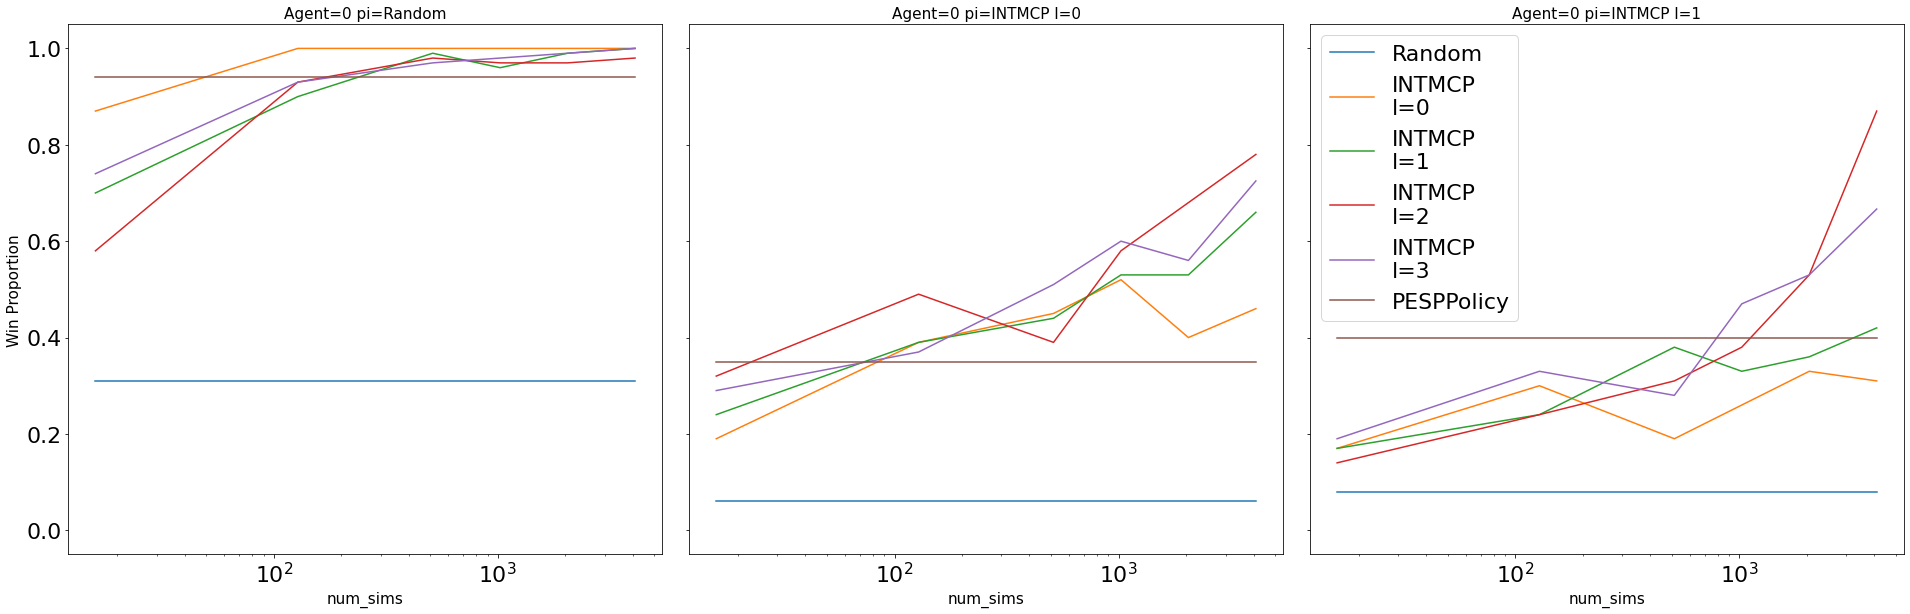

In [15]:
plot_lib.plot_pairwise_pis_y_by_x(
    df, 
    x_key='num_sims',
    y_key="proportion_num_outcome_WIN", 
    y_err_key=None,
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Win Proportion",
        "sharex": False,
        "sharey": True,
        "ylim": (-0.05, 1.05),
    }
)

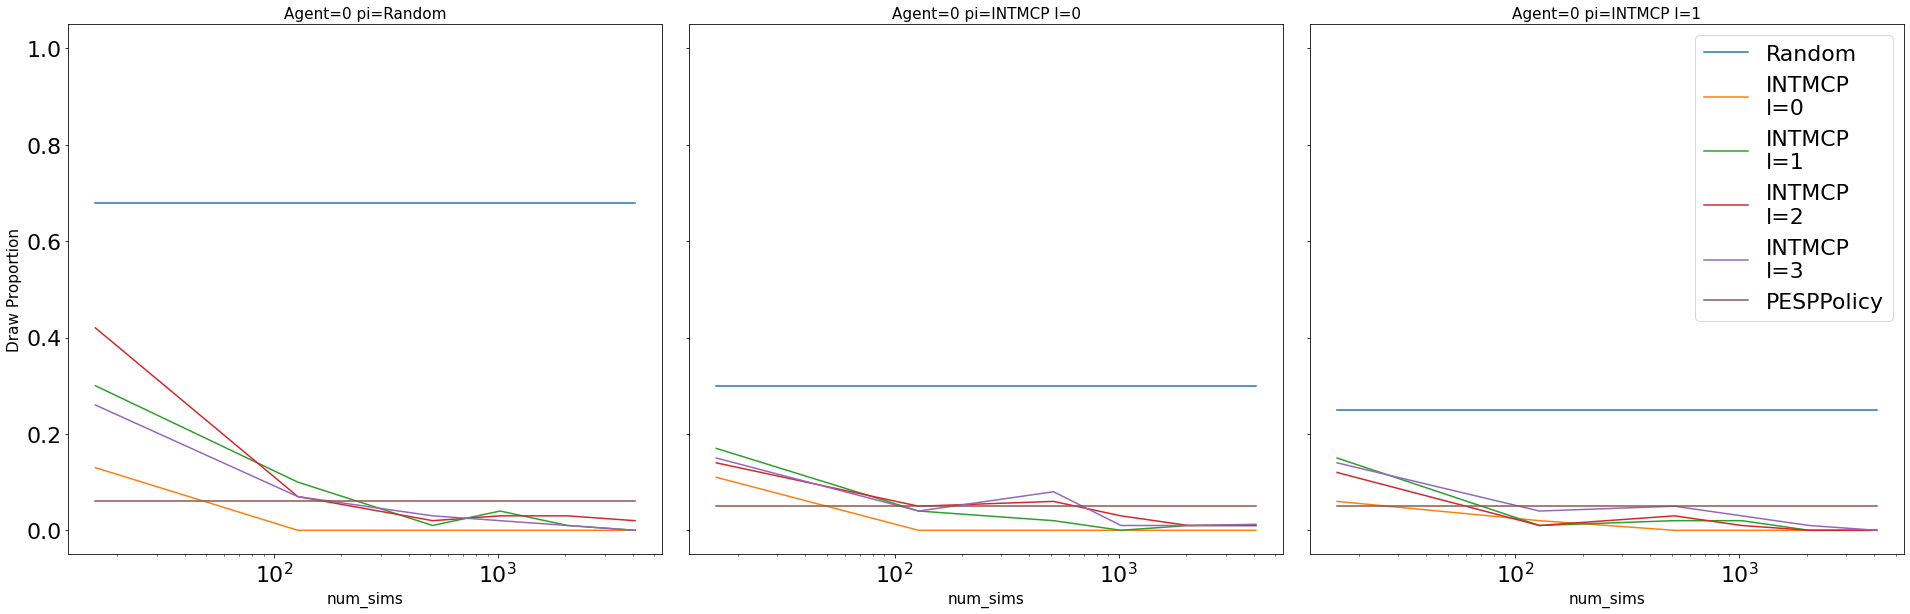

In [16]:
plot_lib.plot_pairwise_pis_y_by_x(
    df, 
    x_key='num_sims',
    y_key="proportion_num_outcome_DRAW", 
    y_err_key=None,
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Draw Proportion",
        "sharex": False,
        "sharey": True,
        "ylim": (-0.05, 1.05),
    }
)